In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/leonidastaliadouros/Documents/Datathon/enriched_data.csv'
df = pd.read_csv(file_path)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Day of Week,Time of Day,Weekday or Weekend,Quarter,Product Name
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,08:26:00,Weekday,4,CREAM CUPID HEARTS COAT HANGER
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,Wednesday,08:26:00,Weekday,4,GLASS STAR FROSTED T-LIGHT HOLDER
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,08:26:00,Weekday,4,KNITTED UNION FLAG HOT WATER BOTTLE
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,08:26:00,Weekday,4,RED WOOLLY HOTTIE WHITE HEART.
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,Wednesday,08:26:00,Weekday,4,SET 7 BABUSHKA NESTING BOXES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,23.40,Friday,12:50:00,Weekday,4,CIRCUS PARADE LUNCH BOX
397920,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,Friday,12:50:00,Weekday,4,PACK OF 20 SPACEBOY NAPKINS
397921,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80,Friday,12:50:00,Weekday,4,PLASTERS IN TIN CIRCUS PARADE
397922,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80,Friday,12:50:00,Weekday,4,PLASTERS IN TIN STRONGMAN


## **Statistics and Preliminary Data Exploration**

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   InvoiceNo           397924 non-null  int64  
 1   StockCode           397924 non-null  object 
 2   Description         397924 non-null  object 
 3   Quantity            397924 non-null  int64  
 4   InvoiceDate         397924 non-null  object 
 5   UnitPrice           397924 non-null  float64
 6   CustomerID          397924 non-null  float64
 7   Country             397924 non-null  object 
 8   Revenue             397924 non-null  float64
 9   Day of Week         397924 non-null  object 
 10  Time of Day         397924 non-null  object 
 11  Weekday or Weekend  397924 non-null  object 
 12  Quarter             397924 non-null  int64  
 13  Product Name        397924 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 42.5+ MB


In [3]:
df.isnull().sum().sort_values(ascending = False)


InvoiceNo             0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID            0
Country               0
Revenue               0
Day of Week           0
Time of Day           0
Weekday or Weekend    0
Quarter               0
Product Name          0
dtype: int64

In [4]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Revenue,Quarter
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,13.021823,3.116174,15294.315171,22.394749,2.856106
std,13106.167695,180.420210,22.096788,1713.169877,309.055588,1.121873
min,536365.000000,1.000000,0.000000,12346.000000,0.000000,1.000000
25%,549234.000000,2.000000,1.250000,13969.000000,4.680000,2.000000
50%,561893.000000,6.000000,1.950000,15159.000000,11.800000,3.000000
75%,572090.000000,12.000000,3.750000,16795.000000,19.800000,4.000000
max,581587.000000,80995.000000,8142.750000,18287.000000,168469.600000,4.000000


In [5]:
df[df.isna().any(axis=1)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Day of Week,Time of Day,Weekday or Weekend,Quarter,Product Name


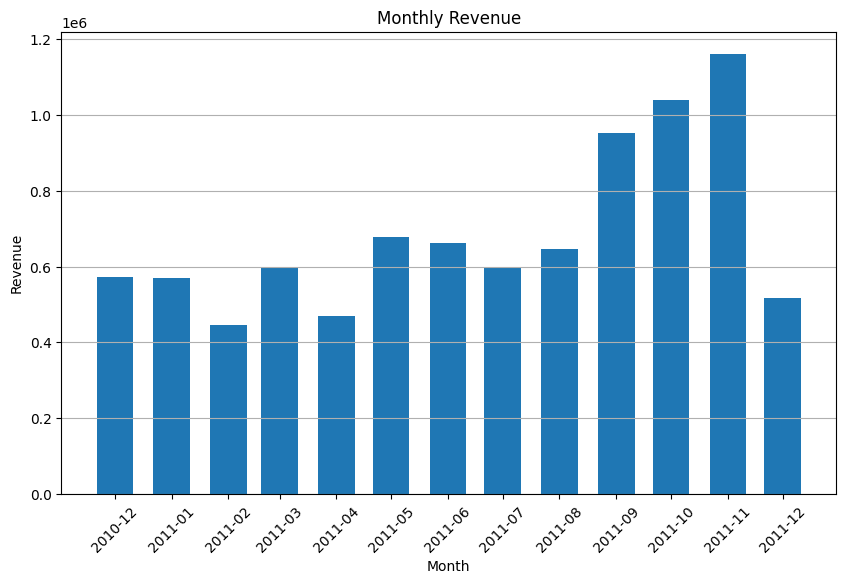

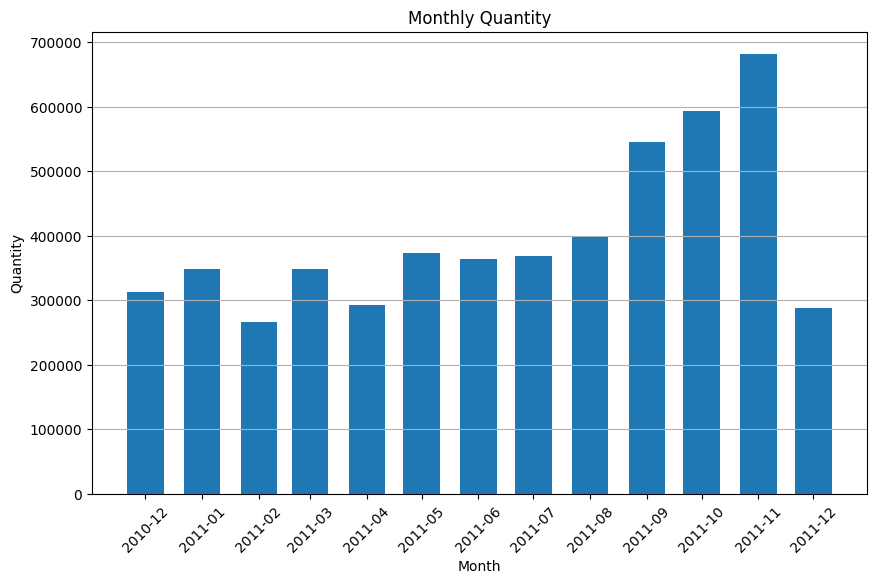

In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['YearMonth'] = df['YearMonth'].dt.to_timestamp() 
grouped = df.groupby('YearMonth')
monthly_quantity = grouped['Quantity'].sum()
monthly_revenue = grouped['Revenue'].sum()
df.columns.to_list()

plt.figure(figsize=(10,6))
plt.bar(monthly_revenue.index, monthly_revenue.values, width=20)  
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')
plt.xticks(monthly_revenue.index, monthly_revenue.index.strftime('%Y-%m'), rotation=45)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10,6))
plt.bar(monthly_quantity.index, monthly_quantity.values, width=20)  
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Monthly Quantity')
plt.xticks(monthly_quantity.index, monthly_quantity.index.strftime('%Y-%m'), rotation=45)
plt.grid(axis='y')
plt.show()

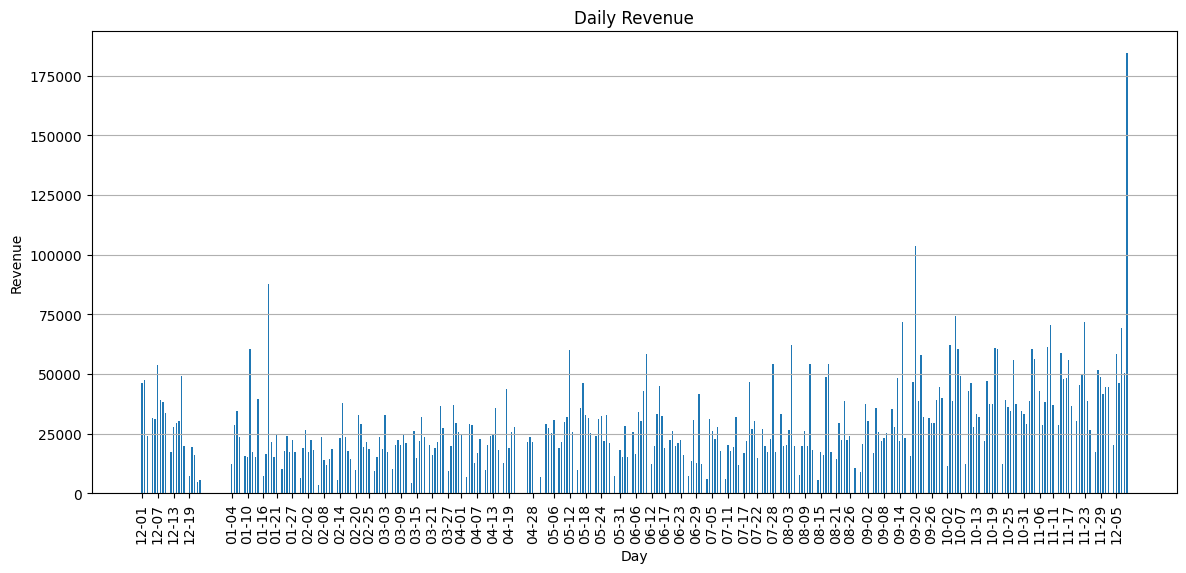

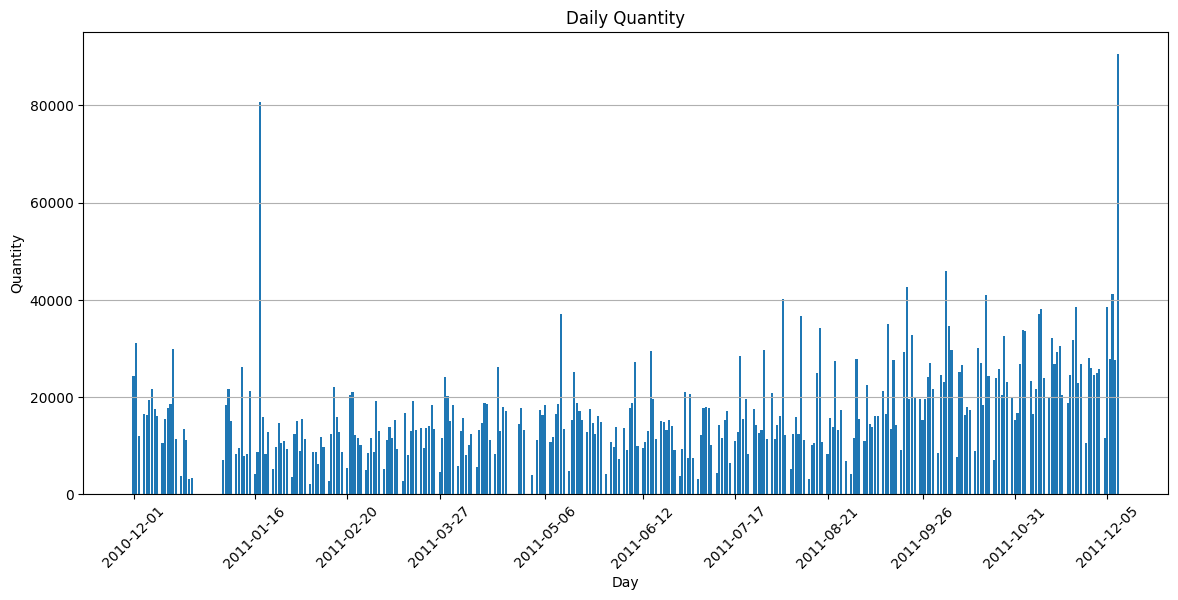

YearMonthDay
2011-12-09    90582
2011-01-18    80618
2011-10-05    45918
2011-09-20    42642
2011-12-07    41102
Name: Quantity, dtype: int64


In [7]:
df['YearMonthDay'] = df['InvoiceDate'].dt.to_period('D').dt.to_timestamp()

grouped = df.groupby('YearMonthDay')
daily_quantity = grouped['Quantity'].sum()
daily_revenue = grouped['Revenue'].sum()


plt.figure(figsize=(14, 6))
plt.bar(daily_revenue.index, daily_revenue.values, width=0.5)  
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.title('Daily Revenue')
plt.xticks(daily_revenue.index[::5], daily_revenue[::5].index.strftime('%m-%d'), rotation=90)  
plt.grid(axis='y')
plt.show()


plt.figure(figsize=(14, 6))
plt.bar(daily_quantity.index, daily_quantity.values, width=0.8)
plt.xlabel('Day')
plt.ylabel('Quantity')
plt.title('Daily Quantity')
plt.xticks(daily_quantity.index[::30], daily_quantity.index[::30].strftime('%Y-%m-%d'), rotation=45)
plt.grid(axis='y')
plt.show()

days_with_max_quantity = daily_quantity.sort_values(ascending=False).head(5)
print(days_with_max_quantity)

In [ ]:
sales_per_country = df.groupby('Country')['Revenue'].sum().reset_index()
sales_per_country.columns = ['Country', 'TotalRevenue']
sales_per_country = sales_per_country.sort_values('TotalRevenue', ascending=False)

print(sales_per_country.head())


           Country  TotalRevenue
35  United Kingdom   7308391.554
23     Netherlands    285446.340
10            EIRE    265545.900
14         Germany    228867.140
13          France    209024.050


In [5]:
import plotly.express as px

fig = px.choropleth(
    sales_per_country,
    locations="Country",             
    locationmode="country names",     
    color="TotalRevenue",             
    hover_name="Country",             
    hover_data={"TotalRevenue": ":,.0f"},  
    color_continuous_scale=px.colors.sequential.Blues,
    title="Total Sales per Country"
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='orthographic'  
    ),
    margin=dict(l=0, r=0, t=50, b=0),
)

fig.show()

fig.write_html('/users/leonidastaliadouros/documents/datathon/dynamic_globe.html')



# **Early observations**

- The original time series shows end of year peaks, an indicator for strong seasonality and spikes on special days.

- Same days are very calm, while other are extrme, hence variance is heteroskedastic (it changes over time).

- Standard linear models (like Linear Regression), or simple neural networks would struggle to fit both nonlinear effects and sudden jumps, if we also consider the small quantity of the data

- Splitting the data further on hour level, is likely to introduce more noise and propagate further the error in our predictive modeling, while staying at montly produces way too few observations for a proper prediction, apart from simple, moving average - based models (f.i. ARIMA)

In [8]:
country_counting = df['Country'].value_counts()
separate_countries = country_counting[country_counting>=800].index.tolist()
print(len(separate_countries)) #count 100 - 28 countries, count 500/600 - 15 countries, count 800/1000 - 11 countries

11


In [9]:
df['Country'] = df['Country'].apply(lambda x: x if x in separate_countries else 'Smaller_countries')

grouped2 = df.groupby(['Country', 'YearMonthDay']).agg({'Quantity':'sum', 'Revenue':'sum'}).reset_index()
print(grouped2.head())
sales_days_count = grouped2.groupby('Country')['YearMonthDay'].nunique()

print(sales_days_count)


     Country YearMonthDay  Quantity  Revenue
0  Australia   2010-12-01       107   358.25
1  Australia   2010-12-08       214   258.90
2  Australia   2010-12-17       146   415.70
3  Australia   2011-01-06      4802  7154.38
4  Australia   2011-01-10        96    81.60
Country
Australia             44
Belgium               83
EIRE                 154
France               205
Germany              201
Netherlands           63
Norway                30
Portugal              47
Smaller_countries    173
Spain                 76
Switzerland           47
United Kingdom       305
Name: YearMonthDay, dtype: int64


# **Feature Engineering**

In [10]:
grouped2['day_of_week'] = grouped2['YearMonthDay'].dt.dayofweek
grouped2['month'] = grouped2['YearMonthDay'].dt.month
grouped2['day_of_month'] = grouped2['YearMonthDay'].dt.day
grouped2['is_weekend'] = (grouped2['day_of_week'] >= 5).astype(int)

grouped2['is_christmas'] = ((grouped2['YearMonthDay'].dt.month == 12) & 
                            (grouped2['YearMonthDay'].dt.day == 25)).astype(int) #not relevant eventually, im not exporting on christmas

grouped2['is_black_friday'] = ((grouped2['YearMonthDay'].dt.month == 11) & 
                               (grouped2['YearMonthDay'].dt.day >= 23) &
                               (grouped2['YearMonthDay'].dt.day <= 29) &
                               (grouped2['day_of_week'] == 4)).astype(int)  #not selling at black friday as well


In [11]:
weekend_stats = grouped2.groupby(['Country', 'is_weekend'])['Quantity'].mean().unstack()
print(weekend_stats)

black_friday_stats = grouped2.groupby(['Country', 'is_black_friday'])['Quantity'].mean().unstack()
print(black_friday_stats)

christmas_stats = grouped2.groupby(['Country', 'is_christmas'])['Quantity'].mean().unstack()
print(christmas_stats)

day_stats = grouped2.groupby(['Country', 'day_of_week'])['Quantity'].mean().unstack()
print(day_stats)

print(grouped2['day_of_week'].unique())


is_weekend                    0            1
Country                                     
Australia           2031.707317   303.000000
Belgium              280.961538   264.400000
EIRE                 919.330935   849.200000
France               572.788889   334.800000
Germany              599.770492   528.055556
Netherlands         3214.163934  2436.500000
Norway               661.793103   146.000000
Portugal             340.111111   408.500000
Smaller_countries    801.969136   833.454545
Spain                356.826087   475.714286
Switzerland          598.613636  1248.000000
United Kingdom     15129.098039  8231.040000
is_black_friday               0        1
Country                                 
Australia           1913.840909      NaN
Belgium              279.963855      NaN
EIRE                 917.862745     92.0
France               542.372549    828.0
Germany              596.090000     45.0
Netherlands         3189.476190      NaN
Norway               646.344828    594.0
P

In [12]:
#Then we explore spesific days that correspond to the spikes we observed in the beginning

total_sales_per_day = grouped2.groupby('YearMonthDay')['Quantity'].sum()
top_sales_days = total_sales_per_day.sort_values(ascending=False).head(20)

print(top_sales_days)

YearMonthDay
2011-12-09    90582
2011-01-18    80618
2011-10-05    45918
2011-09-20    42642
2011-12-07    41102
2011-10-20    40897
2011-08-04    40097
2011-12-05    38428
2011-11-23    38412
2011-11-10    38112
2011-05-12    37149
2011-11-09    37018
2011-08-11    36710
2011-09-13    35029
2011-10-06    34581
2011-08-18    34077
2011-11-03    33737
2011-11-04    33620
2011-09-22    32816
2011-10-27    32557
Name: Quantity, dtype: int64


In [13]:
#after the previous observation we add one more feature 'special_day' for the days where there is a large amount of sales

special_days = ['2011-12-09', '2011-01-18']
grouped2['is_special_day'] = grouped2['YearMonthDay'].isin(pd.to_datetime(special_days)).astype(int)

At the end of the feature extraction we observe:

- After adding special day, weekdays, price volatility flags, and country encoding, the inputs became a rich feature set.

- Hence we have a mixture of both continuous and categorical feature (e.g., "price_spike_flag" is binary, "month" is discrete).

- XGBoost is the natural choice as it is extremely good at handling mixed-type features without requiring much preprocessing.

<Figure size 1200x600 with 0 Axes>

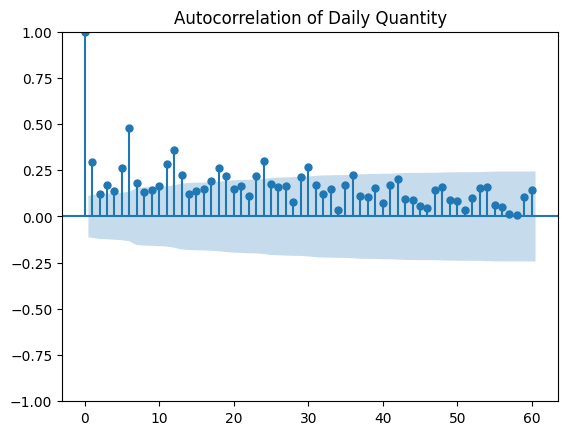

<Figure size 1200x600 with 0 Axes>

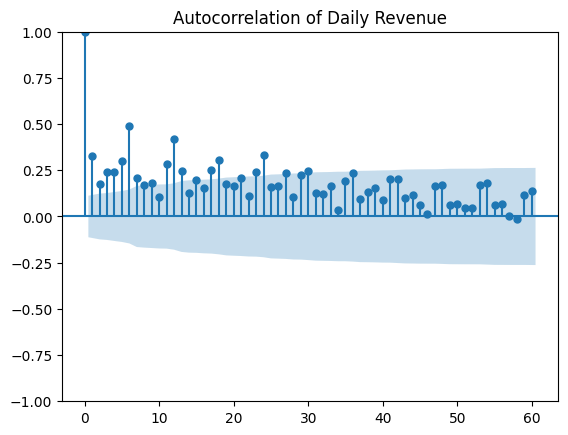

In [14]:
#Autocorrelation check
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

historical = grouped2[grouped2['YearMonthDay'] <= pd.Timestamp('2011-12-08')]
daily_quantity_hist = historical.groupby('YearMonthDay')['Quantity'].sum()
daily_revenue_hist = historical.groupby('YearMonthDay')['Revenue'].sum()

# Quantity autocorrelation
plt.figure(figsize=(12,6))
plot_acf(daily_quantity_hist, lags=60)
plt.title('Autocorrelation of Daily Quantity')
plt.show()

# Revenue autocorrelation
plt.figure(figsize=(12,6))
plot_acf(daily_revenue_hist, lags=60)
plt.title('Autocorrelation of Daily Revenue')
plt.show()



From the previous graph we observe that the autocorrelation plot for daily quantity exhibits significant correlations at small lags (1–5 days) and milder repeated peaks around lag 7, 14, and 28, indicating short-term dependency and potential weak weekly or monthly seasonality. Consequently, this justifies the use of a flexible nonlinear model such as XGBoost, capable of capturing short-term dynamics and complex interactions without assuming strict stationarity or linearity, unlike traditional time series models (ARIMA, ETS).

[0]	validation_0-rmse:6425.00594
[1]	validation_0-rmse:6176.84166
[2]	validation_0-rmse:5935.09422
[3]	validation_0-rmse:5707.25240
[4]	validation_0-rmse:5512.28511
[5]	validation_0-rmse:5303.93128
[6]	validation_0-rmse:5309.32914
[7]	validation_0-rmse:5164.19726
[8]	validation_0-rmse:4999.08727
[9]	validation_0-rmse:4843.86759
[10]	validation_0-rmse:4703.50873
[11]	validation_0-rmse:4572.89628
[12]	validation_0-rmse:4445.75879
[13]	validation_0-rmse:4318.71070
[14]	validation_0-rmse:4325.26381
[15]	validation_0-rmse:4211.03301
[16]	validation_0-rmse:4113.93208
[17]	validation_0-rmse:3996.71375
[18]	validation_0-rmse:3921.40240
[19]	validation_0-rmse:3923.98276
[20]	validation_0-rmse:3845.62034
[21]	validation_0-rmse:3780.53989
[22]	validation_0-rmse:3706.39212
[23]	validation_0-rmse:3636.81361
[24]	validation_0-rmse:3578.97115
[25]	validation_0-rmse:3506.99958
[26]	validation_0-rmse:3455.30680
[27]	validation_0-rmse:3399.00822
[28]	validation_0-rmse:3351.47848
[29]	validation_0-rmse:3

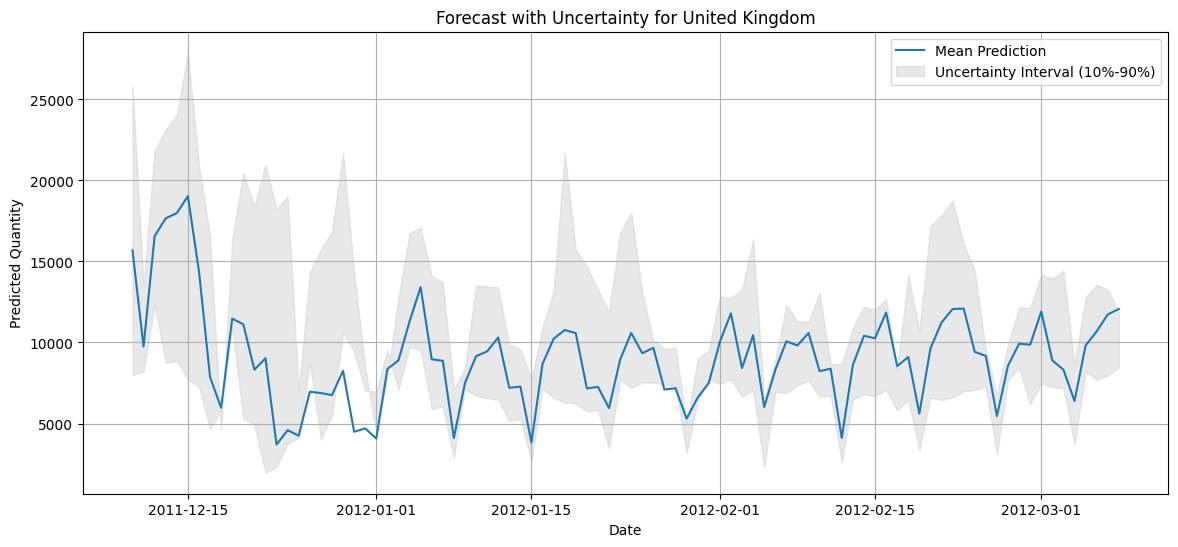

In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split

#here we try to build three different models for predicting the mean, 10% and 90% quantile

le = LabelEncoder()
grouped2['Country_encoded'] = le.fit_transform(grouped2['Country'])

features = ['Country_encoded', 'day_of_week', 'month', 'day_of_month', 'is_special_day']
X = grouped2[features]
y = grouped2['Quantity']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

#params have been fine-tuned for all models

params_mean = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'learning_rate': 0.05,
    'n_estimators': 400,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
    'eval_metric': 'rmse',
    'callbacks': [xgb.callback.EarlyStopping(rounds=30)]
}
model = xgb.XGBRegressor(**params_mean)
model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=True)

params_lower = {
    'objective': 'reg:quantileerror',
    'quantile_alpha': 0.1,
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 400,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}
model_lower = xgb.XGBRegressor(**params_lower)
model_lower.fit(X_train, y_train, verbose=True)

params_upper = {
    'objective': 'reg:quantileerror',
    'quantile_alpha': 0.9,
    'max_depth': 5,
    'learning_rate': 0.05,
    'n_estimators': 400,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}
model_upper = xgb.XGBRegressor(**params_upper)
model_upper.fit(X_train, y_train, verbose=True)

future_dates = pd.date_range(
    start=grouped2['YearMonthDay'].max() + pd.Timedelta(days=1),
    periods=90
)

countries = grouped2['Country'].dropna().unique()
future_list = []
for country in countries:
    temp = pd.DataFrame({
        'Country': [country] * len(future_dates),
        'YearMonthDay': future_dates
    })
    future_list.append(temp)

future = pd.concat(future_list).reset_index(drop=True)

future['day_of_week'] = future['YearMonthDay'].dt.dayofweek
future['month'] = future['YearMonthDay'].dt.month
future['day_of_month'] = future['YearMonthDay'].dt.day
future['is_special_day'] = future['YearMonthDay'].isin(pd.to_datetime(special_days)).astype(int)
future['Country_encoded'] = le.transform(future['Country'])

X_future = future[features]

future['Predicted_Quantity'] = model.predict(X_future)
future['Predicted_Lower'] = model_lower.predict(X_future)
future['Predicted_Upper'] = model_upper.predict(X_future)

future['Predicted_Quantity'] = future['Predicted_Quantity'].clip(lower=0)
future['Predicted_Lower'] = future['Predicted_Lower'].clip(lower=0)
future['Predicted_Upper'] = future['Predicted_Upper'].clip(lower=0)

print(future[['Country', 'YearMonthDay', 'Predicted_Quantity', 'Predicted_Lower', 'Predicted_Upper']].head())
future['YearMonth'] = future['YearMonthDay'].dt.to_period('M')

forecast_monthly = future.groupby(['Country', 'YearMonth']).agg({
    'Predicted_Quantity': 'sum',
    'Predicted_Lower': 'sum',
    'Predicted_Upper': 'sum'
}).reset_index()

print(forecast_monthly)

country_to_plot = 'United Kingdom'  

plot_data = future[future['Country'] == country_to_plot]

plt.figure(figsize=(14,6))
plt.plot(plot_data['YearMonthDay'], plot_data['Predicted_Quantity'], label='Mean Prediction')
plt.fill_between(plot_data['YearMonthDay'],
                 plot_data['Predicted_Lower'],
                 plot_data['Predicted_Upper'],
                 color='lightgray', alpha=0.5, label='Uncertainty Interval (10%-90%)')
plt.title(f"Forecast with Uncertainty for {country_to_plot}")
plt.xlabel('Date')
plt.ylabel('Predicted Quantity')
plt.legend()
plt.grid()
plt.show()


#future.to_csv('daily_forecast_with_uncertainty.csv', index=False)
#forecast_monthly.to_csv('monthly_forecast_with_uncertainty.csv', index=False)


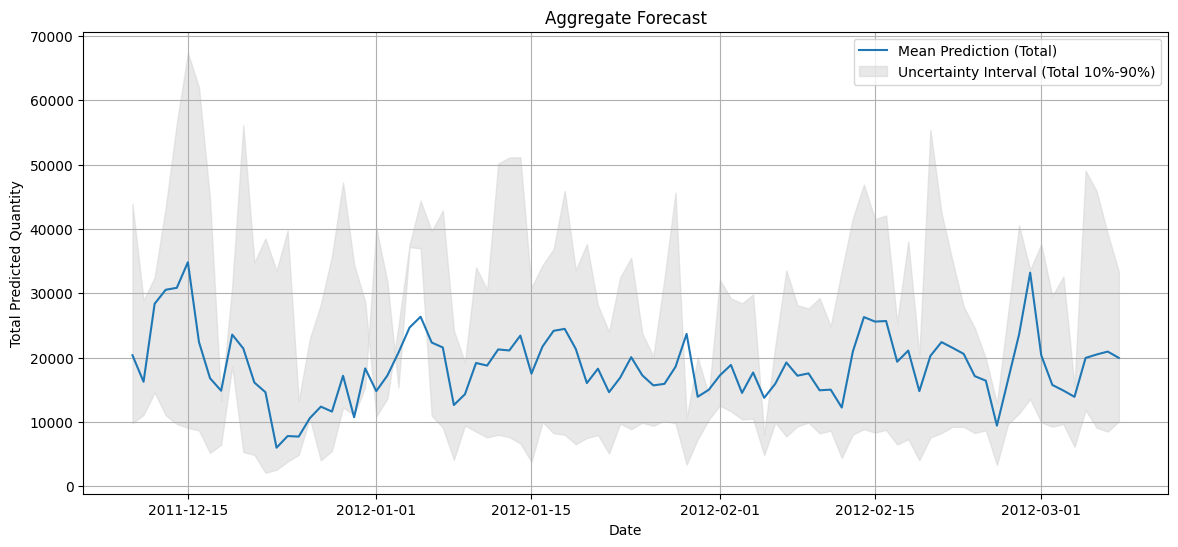

In [53]:
total_future = future.groupby('YearMonthDay').agg({
    'Predicted_Quantity': 'sum',
    'Predicted_Lower': 'sum',
    'Predicted_Upper': 'sum'
}).reset_index()

plt.figure(figsize=(14,6))
plt.plot(total_future['YearMonthDay'], total_future['Predicted_Quantity'], label='Mean Prediction (Total)')
plt.fill_between(total_future['YearMonthDay'],
                 total_future['Predicted_Lower'],
                 total_future['Predicted_Upper'],
                 color='lightgray', alpha=0.5, label='Uncertainty Interval (Total 10%-90%)')
plt.title("Aggregate Forecast")
plt.xlabel('Date')

plt.ylabel('Total Predicted Quantity')
plt.legend()
plt.grid()
plt.show()


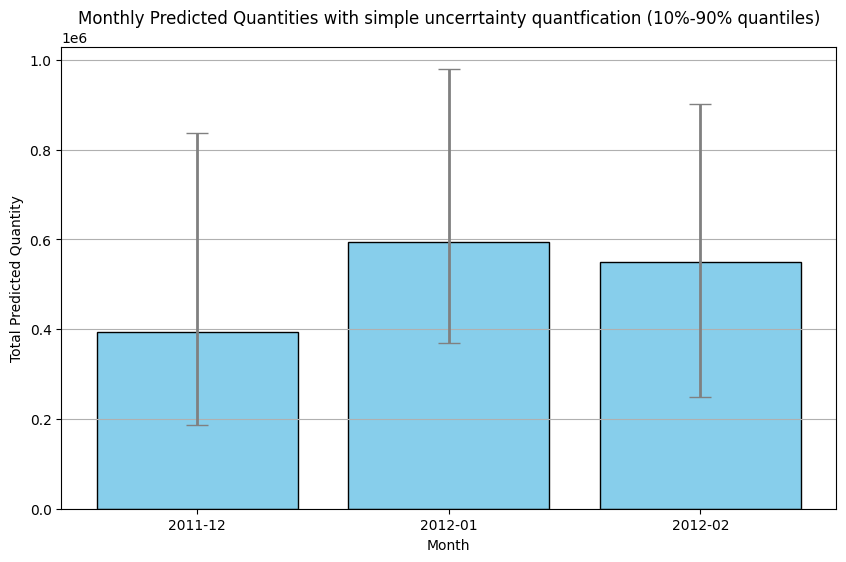

In [52]:
future['YearMonth'] = future['YearMonthDay'].dt.to_period('M')
monthly_total = future.groupby('YearMonth').agg({
    'Predicted_Quantity': 'sum',
    'Predicted_Lower': 'sum',
    'Predicted_Upper': 'sum'
}).reset_index()

months_of_interest = ['2011-12', '2012-01', '2012-02']
monthly_total = monthly_total[monthly_total['YearMonth'].astype(str).isin(months_of_interest)]
monthly_total['error_upper'] = monthly_total['Predicted_Upper'] - monthly_total['Predicted_Quantity']
monthly_total['error_lower'] = monthly_total['Predicted_Quantity'] - monthly_total['Predicted_Lower']

plt.figure(figsize=(10,6))
plt.bar(
    monthly_total['YearMonth'].astype(str),
    monthly_total['Predicted_Quantity'],
    yerr=[monthly_total['error_lower'], monthly_total['error_upper']],
    capsize=8,
    color='skyblue',
    edgecolor='black',
    error_kw=dict(ecolor='gray', lw=2)
)

plt.title('Monthly Predicted Quantities with simple uncerrtainty quantfication (10%-90% quantiles)')
plt.xlabel('Month')
plt.ylabel('Total Predicted Quantity')
plt.grid(axis='y')
plt.show()


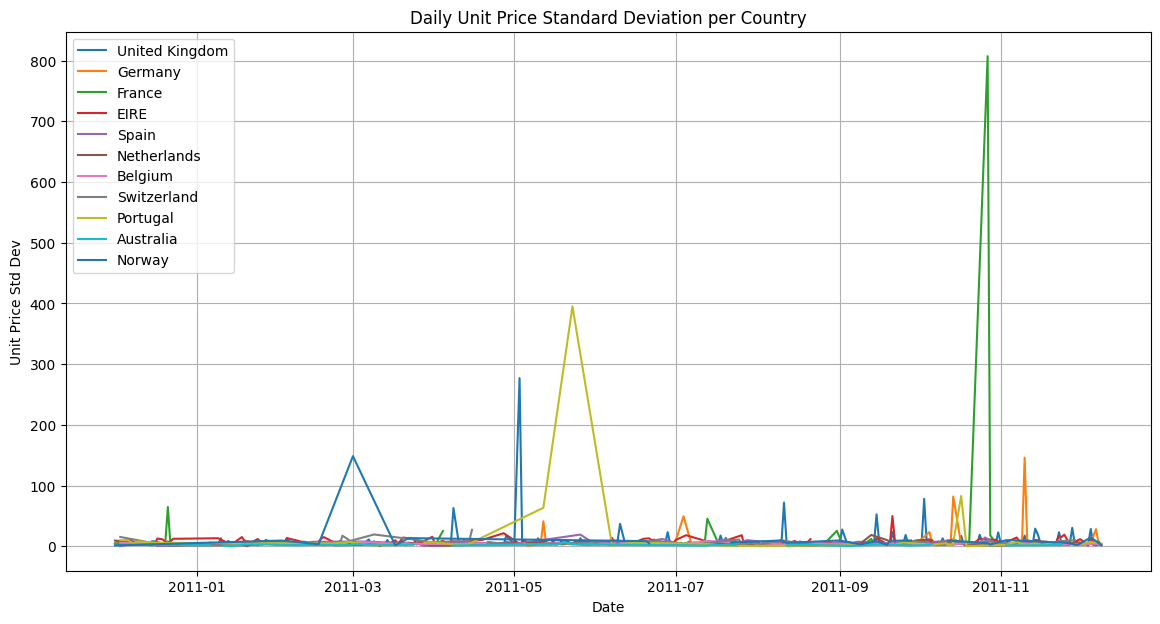

In [15]:
#then we need to explore if unit price which is neccessairy for the calculation of the total revenue has enough variance over different countries that would justify a model of its own

price_variation = df.groupby(['Country', 'YearMonthDay']).agg({
    'UnitPrice': ['mean', 'std']
}).reset_index()

price_variation.columns = ['Country', 'YearMonthDay', 'UnitPrice_Mean', 'UnitPrice_Std']
plt.figure(figsize=(14, 7))

for country in separate_countries:
    subset = price_variation[price_variation['Country'] == country]
    plt.plot(subset['YearMonthDay'], subset['UnitPrice_Std'], label=country)

plt.title('Daily Unit Price Standard Deviation per Country')
plt.xlabel('Date')
plt.ylabel('Unit Price Std Dev')
plt.legend()
plt.grid()
plt.show()



[0]	validation_0-rmse:6399.14751
[1]	validation_0-rmse:6196.72438
[2]	validation_0-rmse:6204.63511
[3]	validation_0-rmse:6005.16959
[4]	validation_0-rmse:5830.92776
[5]	validation_0-rmse:5832.19506
[6]	validation_0-rmse:5665.94555
[7]	validation_0-rmse:5669.16203
[8]	validation_0-rmse:5674.78256
[9]	validation_0-rmse:5465.65880
[10]	validation_0-rmse:5468.56463
[11]	validation_0-rmse:5471.39524
[12]	validation_0-rmse:5473.01829
[13]	validation_0-rmse:5309.93032
[14]	validation_0-rmse:5177.26355
[15]	validation_0-rmse:5004.09524
[16]	validation_0-rmse:4866.75621
[17]	validation_0-rmse:4719.20655
[18]	validation_0-rmse:4722.02714
[19]	validation_0-rmse:4614.89990
[20]	validation_0-rmse:4504.65431
[21]	validation_0-rmse:4422.96275
[22]	validation_0-rmse:4296.33194
[23]	validation_0-rmse:4206.70523
[24]	validation_0-rmse:4118.38269
[25]	validation_0-rmse:4026.37538
[26]	validation_0-rmse:3947.53105
[27]	validation_0-rmse:3875.11715
[28]	validation_0-rmse:3826.02508
[29]	validation_0-rmse:3

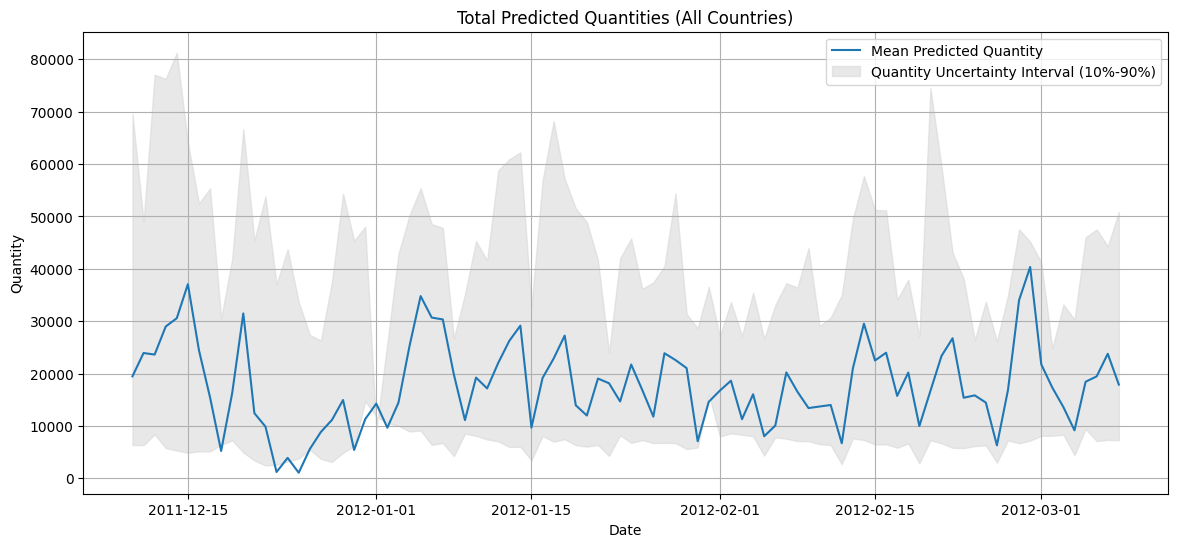

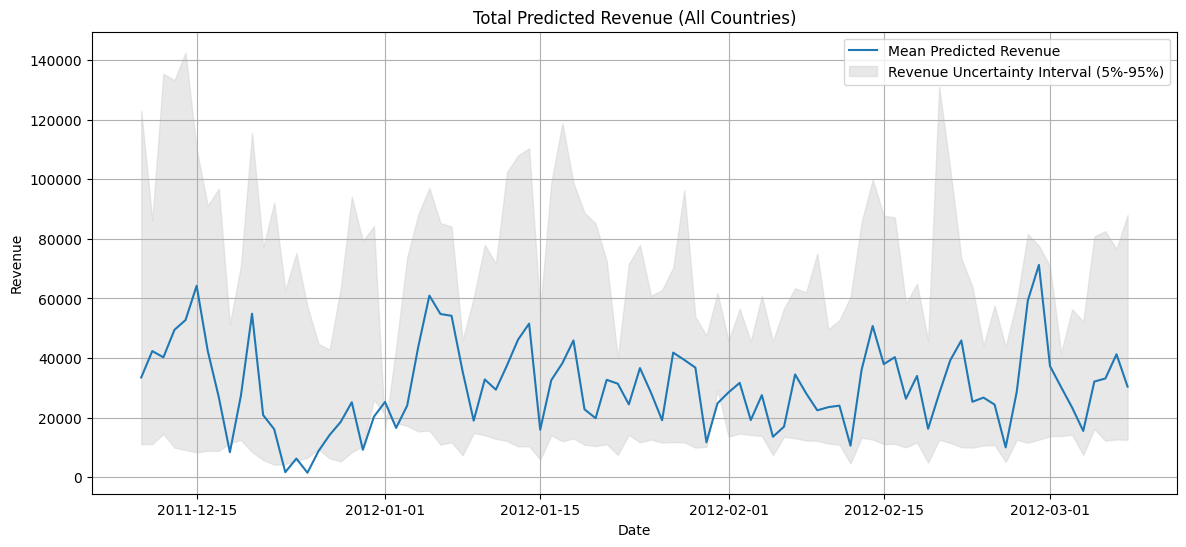

In [18]:
#here I use three seperate models for mean prediction and for calculating the 10% and 90% quantiles, while also incorporating our price observations. The fact that three seperate models are trained create some minor inconsistencies.
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


special_days = ['2011-12-09', '2011-01-18']  
grouped2['day_of_week'] = grouped2['YearMonthDay'].dt.dayofweek
grouped2['month'] = grouped2['YearMonthDay'].dt.month
grouped2['day_of_month'] = grouped2['YearMonthDay'].dt.day
grouped2['is_special_day'] = grouped2['YearMonthDay'].isin(pd.to_datetime(special_days)).astype(int)

price_variation = df.groupby(['Country', 'YearMonthDay']).agg({
    'UnitPrice': ['mean', 'std']
}).reset_index()
price_variation.columns = ['Country', 'YearMonthDay', 'UnitPrice_Mean', 'UnitPrice_Std']
threshold = 30.0
price_variation['price_spike_flag'] = (price_variation['UnitPrice_Std'] > threshold).astype(int)
grouped2 = grouped2.merge(price_variation[['Country', 'YearMonthDay', 'price_spike_flag']], on=['Country', 'YearMonthDay'], how='left')
grouped2['price_spike_flag'] = grouped2['price_spike_flag'].fillna(0)
le = LabelEncoder()
grouped2['Country_encoded'] = le.fit_transform(grouped2['Country'])

features = ['Country_encoded', 'day_of_week', 'month', 'day_of_month', 'is_special_day', 'price_spike_flag']
X = grouped2[features]
y = grouped2['Quantity']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

params_mean = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'learning_rate': 0.05,
    'n_estimators': 400,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
    'eval_metric': 'rmse',
    'callbacks':None #[xgb.callback.EarlyStopping(rounds=30)]
}
model = xgb.XGBRegressor(**params_mean)
model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=True)

params_lower = params_mean.copy()
params_lower.update({'objective': 'reg:quantileerror', 'quantile_alpha': 0.05})
model_lower = xgb.XGBRegressor(**params_lower)
model_lower.fit(X_train, y_train, verbose=True)

params_upper = params_mean.copy()
params_upper.update({'objective': 'reg:quantileerror', 'quantile_alpha': 0.95})
model_upper = xgb.XGBRegressor(**params_upper)
model_upper.fit(X_train, y_train, verbose=True)
future_dates = pd.date_range(start=grouped2['YearMonthDay'].max() + pd.Timedelta(days=1), periods=90)
countries = grouped2['Country'].dropna().unique()

future_list = []
for country in countries:
    temp = pd.DataFrame({
        'Country': [country] * len(future_dates),
        'YearMonthDay': future_dates
    })
    future_list.append(temp)

future = pd.concat(future_list).reset_index(drop=True)

future['day_of_week'] = future['YearMonthDay'].dt.dayofweek
future['month'] = future['YearMonthDay'].dt.month
future['day_of_month'] = future['YearMonthDay'].dt.day
future['is_special_day'] = future['YearMonthDay'].isin(pd.to_datetime(special_days)).astype(int)
future = future.merge(price_variation[['Country', 'YearMonthDay', 'price_spike_flag']], on=['Country', 'YearMonthDay'], how='left')
future['price_spike_flag'] = future['price_spike_flag'].fillna(0)
future['Country_encoded'] = le.transform(future['Country'])

X_future = future[features]
future['Predicted_Quantity'] = model.predict(X_future)
future['Predicted_Lower'] = model_lower.predict(X_future)
future['Predicted_Upper'] = model_upper.predict(X_future)

future['Predicted_Quantity'] = future['Predicted_Quantity'].clip(lower=0)
future['Predicted_Lower'] = future['Predicted_Lower'].clip(lower=0)
future['Predicted_Upper'] = future['Predicted_Upper'].clip(lower=0)


avg_price_per_country = df.groupby('Country').apply(lambda x: (x['Revenue'].sum() / x['Quantity'].sum())).to_dict()
future['avg_price'] = future['Country'].map(avg_price_per_country)

future['Predicted_Revenue'] = future['Predicted_Quantity'] * future['avg_price']
future['Predicted_Revenue_Lower'] = future['Predicted_Lower'] * future['avg_price']
future['Predicted_Revenue_Upper'] = future['Predicted_Upper'] * future['avg_price']


daily_forecast = future.groupby('YearMonthDay').agg({
    'Predicted_Quantity': 'sum',
    'Predicted_Lower': 'sum',
    'Predicted_Upper': 'sum',
    'Predicted_Revenue': 'sum',
    'Predicted_Revenue_Lower': 'sum',
    'Predicted_Revenue_Upper': 'sum'
}).reset_index()


plt.figure(figsize=(14,6))
plt.plot(daily_forecast['YearMonthDay'], daily_forecast['Predicted_Quantity'], label='Mean Predicted Quantity')
plt.fill_between(daily_forecast['YearMonthDay'],
                 daily_forecast['Predicted_Lower'],
                 daily_forecast['Predicted_Upper'],
                 color='lightgray', alpha=0.5, label='Quantity Uncertainty Interval (10%-90%)')
plt.title('Total Predicted Quantities (All Countries)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14,6))
plt.plot(daily_forecast['YearMonthDay'], daily_forecast['Predicted_Revenue'], label='Mean Predicted Revenue')
plt.fill_between(daily_forecast['YearMonthDay'],
                 daily_forecast['Predicted_Revenue_Lower'],
                 daily_forecast['Predicted_Revenue_Upper'],
                 color='lightgray', alpha=0.5, label='Revenue Uncertainty Interval (5%-95%)')
plt.title('Total Predicted Revenue (All Countries)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()


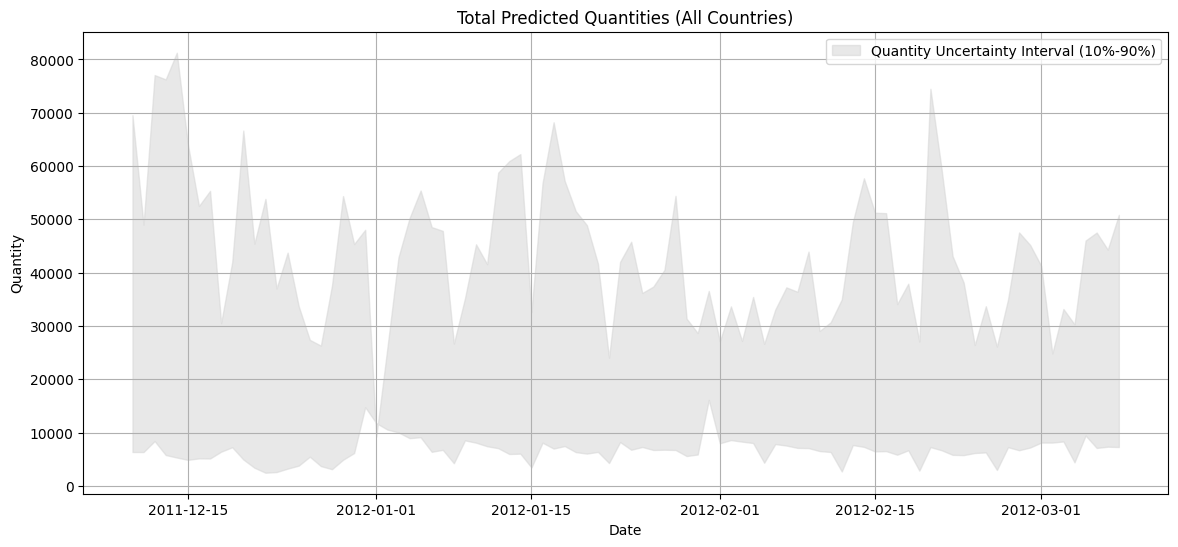

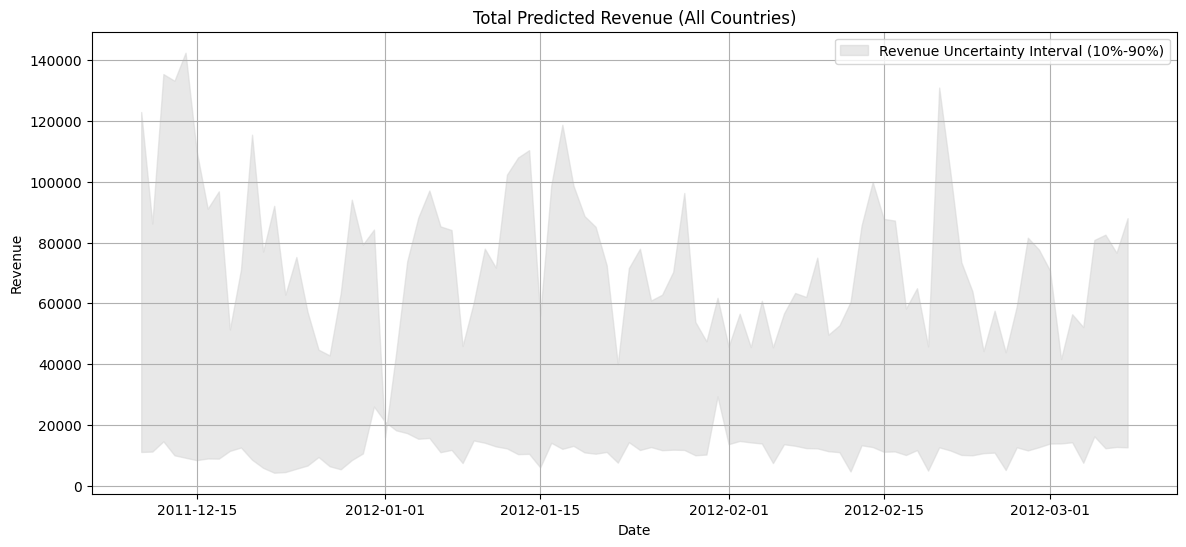

In [21]:
plt.figure(figsize=(14,6))
plt.fill_between(daily_forecast['YearMonthDay'],
                 daily_forecast['Predicted_Lower'],
                 daily_forecast['Predicted_Upper'],
                 color='lightgray', alpha=0.5, label='Quantity Uncertainty Interval (10%-90%)')
plt.title('Total Predicted Quantities (All Countries)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14,6))
plt.fill_between(daily_forecast['YearMonthDay'],
                 daily_forecast['Predicted_Revenue_Lower'],
                 daily_forecast['Predicted_Revenue_Upper'],
                 color='lightgray', alpha=0.5, label='Revenue Uncertainty Interval (10%-90%)')
plt.title('Total Predicted Revenue (All Countries)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()

Note: Despite the fact that autocorrelation plots show short-term dependencies, attempts to include lagged features did not significantly improve predictive performance, hence to avoid overcomplication and/or overfitting, simpler models will be chosen. The latter observation suggests that the important temporal dependencies are already being captured indirectly by the engineered features (e.g., day of week, month, special days, price spikes) and by the model structure itself. Given that XGBoost is highly flexible and capable of modeling nonlinear relationships and memory effects internally through tree ensembles, explicitly adding lagged features was redundant in this context and could introduce noise instead of improving generalization.

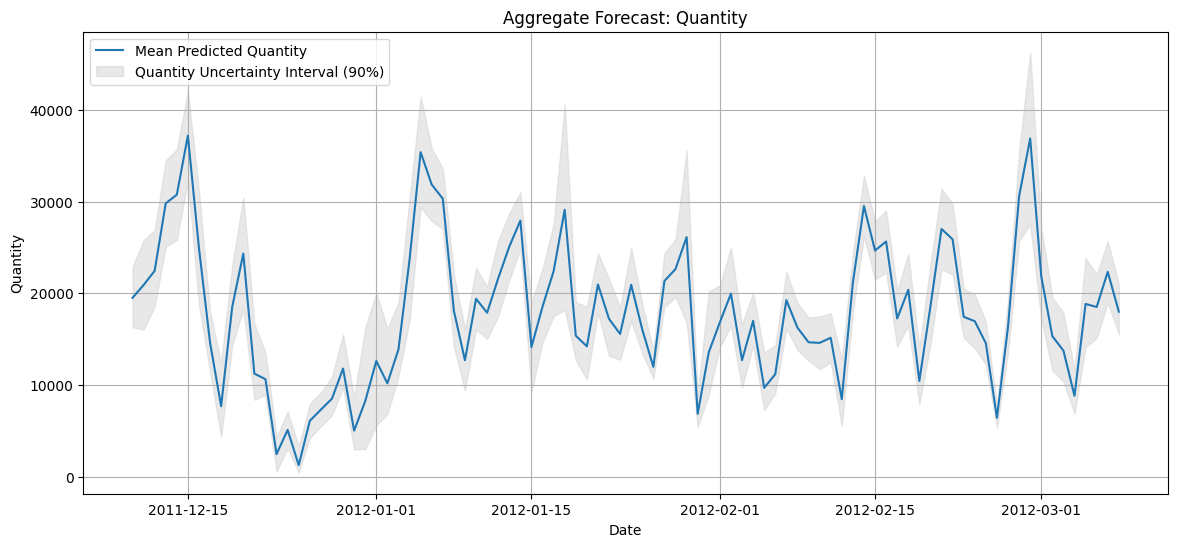

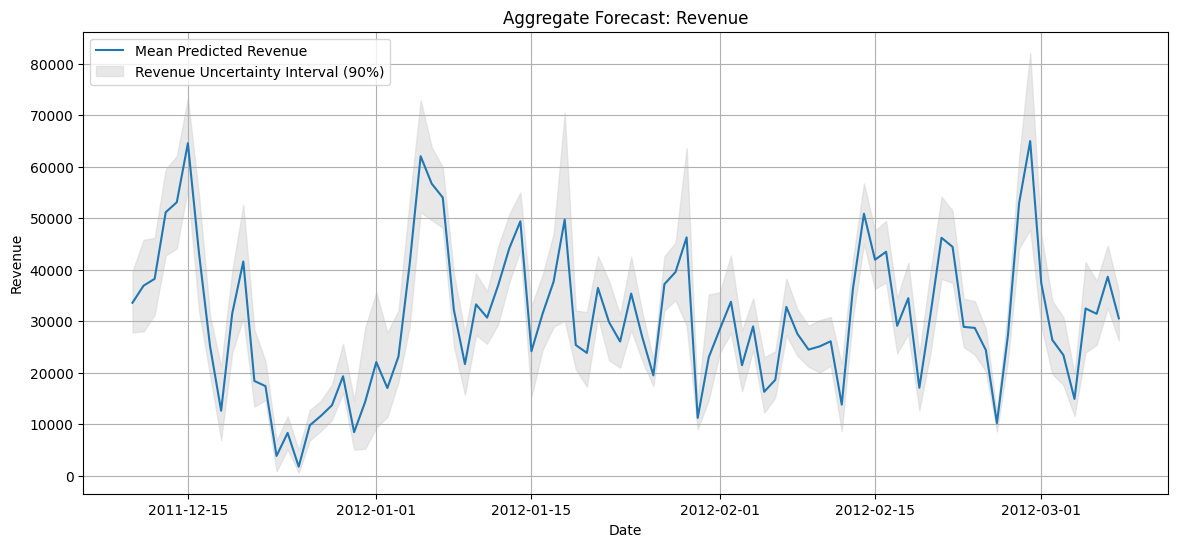

In [ ]:
#here I quantify the uncertainty through model averaging

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


grouped2 = df.groupby(['Country', 'YearMonthDay']).agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()

special_days = ['2011-12-09', '2011-01-18']  
grouped2['day_of_week'] = grouped2['YearMonthDay'].dt.dayofweek
grouped2['month'] = grouped2['YearMonthDay'].dt.month
grouped2['day_of_month'] = grouped2['YearMonthDay'].dt.day
grouped2['is_special_day'] = grouped2['YearMonthDay'].isin(pd.to_datetime(special_days)).astype(int)
price_variation = df.groupby(['Country', 'YearMonthDay']).agg({
    'UnitPrice': ['mean', 'std']
}).reset_index()
price_variation.columns = ['Country', 'YearMonthDay', 'UnitPrice_Mean', 'UnitPrice_Std']
threshold = 30.0
price_variation['price_spike_flag'] = (price_variation['UnitPrice_Std'] > threshold).astype(int)

grouped2 = grouped2.merge(price_variation[['Country', 'YearMonthDay', 'price_spike_flag']], on=['Country', 'YearMonthDay'], how='left')
grouped2['price_spike_flag'] = grouped2['price_spike_flag'].fillna(0)

le = LabelEncoder()
grouped2['Country_encoded'] = le.fit_transform(grouped2['Country'])
features = ['Country_encoded', 'day_of_week', 'month', 'day_of_month', 'is_special_day', 'price_spike_flag']
X = grouped2[features]
y = grouped2['Quantity']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

future_dates = pd.date_range(start=grouped2['YearMonthDay'].max() + pd.Timedelta(days=1), periods=90)
countries = grouped2['Country'].dropna().unique()

future_list = []
for country in countries:
    temp = pd.DataFrame({
        'Country': [country] * len(future_dates),
        'YearMonthDay': future_dates
    })
    future_list.append(temp)

future = pd.concat(future_list).reset_index(drop=True)

future['day_of_week'] = future['YearMonthDay'].dt.dayofweek
future['month'] = future['YearMonthDay'].dt.month
future['day_of_month'] = future['YearMonthDay'].dt.day
future['is_special_day'] = future['YearMonthDay'].isin(pd.to_datetime(special_days)).astype(int)
future = future.merge(price_variation[['Country', 'YearMonthDay', 'price_spike_flag']], on=['Country', 'YearMonthDay'], how='left')
future['price_spike_flag'] = future['price_spike_flag'].fillna(0)
future['Country_encoded'] = le.transform(future['Country'])

X_future = future[features]

n_models = 100
models = []
params_mean = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'learning_rate': 0.05,
    'n_estimators': 300,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

for i in range(n_models):
    model = xgb.XGBRegressor(**params_mean, seed=i*10)
    model.fit(X_train, y_train)
    models.append(model)

predictions = np.array([model.predict(X_future) for model in models])
pred_mean = predictions.mean(axis=0)
pred_std = predictions.std(axis=0)

pred_lower = pred_mean - 1.64 * pred_std
pred_upper = pred_mean + 1.64 * pred_std

future['Predicted_Quantity'] = np.clip(pred_mean, 0, None)
future['Predicted_Lower'] = np.clip(pred_lower, 0, None)
future['Predicted_Upper'] = np.clip(pred_upper, 0, None)

avg_price_per_country = df.groupby('Country').apply(lambda x: (x['Revenue'].sum() / x['Quantity'].sum())).to_dict()
future['avg_price'] = future['Country'].map(avg_price_per_country)

future['Predicted_Revenue'] = future['Predicted_Quantity'] * future['avg_price']
future['Predicted_Revenue_Lower'] = future['Predicted_Lower'] * future['avg_price']
future['Predicted_Revenue_Upper'] = future['Predicted_Upper'] * future['avg_price']

daily_forecast = future.groupby('YearMonthDay').agg({
    'Predicted_Quantity': 'sum',
    'Predicted_Lower': 'sum',
    'Predicted_Upper': 'sum',
    'Predicted_Revenue': 'sum',
    'Predicted_Revenue_Lower': 'sum',
    'Predicted_Revenue_Upper': 'sum'
}).reset_index()

plt.figure(figsize=(14,6))
plt.plot(daily_forecast['YearMonthDay'], daily_forecast['Predicted_Quantity'], label='Mean Predicted Quantity')
plt.fill_between(daily_forecast['YearMonthDay'],
                 daily_forecast['Predicted_Lower'],
                 daily_forecast['Predicted_Upper'],
                 color='lightgray', alpha=0.5, label='Quantity Uncertainty Interval (90%)')
plt.title('Aggregate Forecast: Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14,6))
plt.plot(daily_forecast['YearMonthDay'], daily_forecast['Predicted_Revenue'], label='Mean Predicted Revenue')
plt.fill_between(daily_forecast['YearMonthDay'],
                 daily_forecast['Predicted_Revenue_Lower'],
                 daily_forecast['Predicted_Revenue_Upper'],
                 color='lightgray', alpha=0.5, label='Revenue Uncertainty Interval (90%)')
plt.title('Aggregate Forecast: Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()


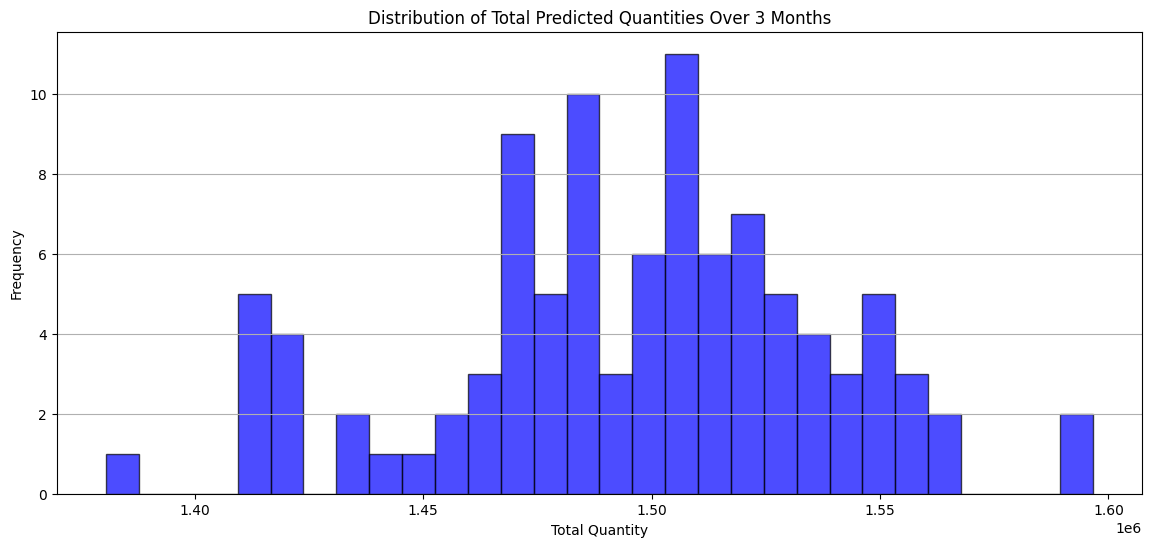

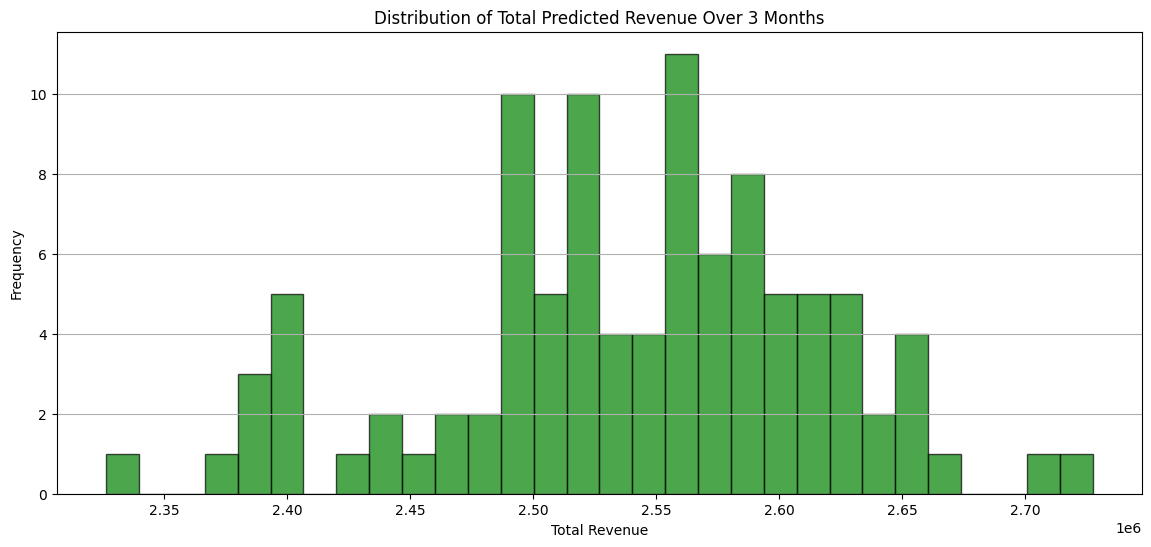

In [2]:
# For each model, sum the entire 90-day forecast
total_quantity_samples = predictions.sum(axis=1)  
total_revenue_samples = (predictions * future['avg_price'].values).sum(axis=1)


plt.figure(figsize=(14,6))
plt.hist(total_quantity_samples, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Total Predicted Quantities Over 3 Months')
plt.xlabel('Total Quantity')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(14,6))
plt.hist(total_revenue_samples, bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Distribution of Total Predicted Revenue Over 3 Months')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


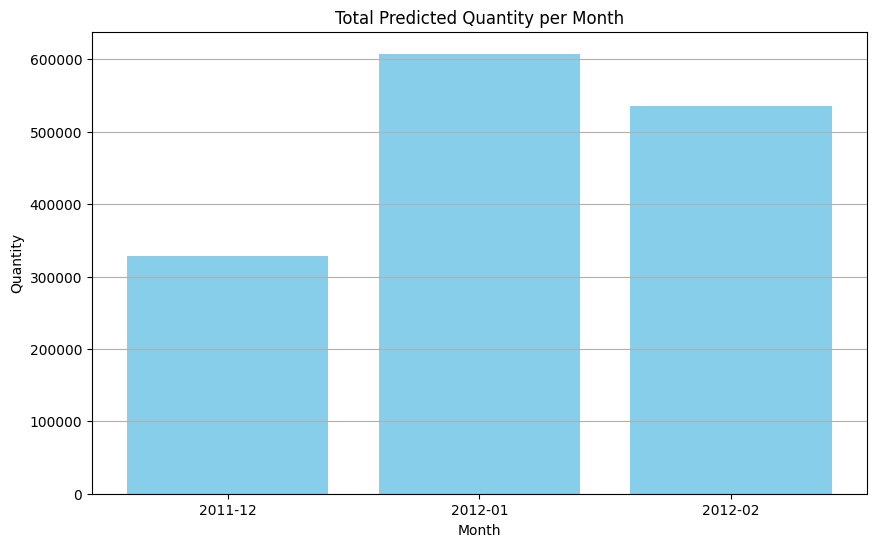

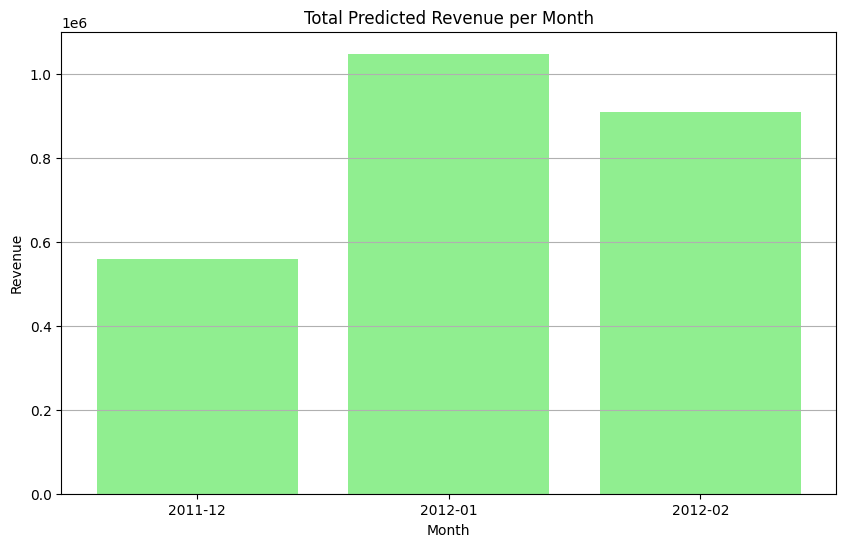

Month: 2011-12, Quantity: 328422, Revenue: 559022.50
Month: 2012-01, Quantity: 607805, Revenue: 1048256.32
Month: 2012-02, Quantity: 535574, Revenue: 910340.65


In [3]:
daily_forecast['YearMonth'] = daily_forecast['YearMonthDay'].dt.to_period('M')

monthly_forecast = daily_forecast.groupby('YearMonth').agg({
    'Predicted_Quantity': 'sum',
    'Predicted_Revenue': 'sum'
}).reset_index()
monthly_forecast = monthly_forecast[monthly_forecast['YearMonth'] <= '2012-02']



plt.figure(figsize=(10,6))
plt.bar(monthly_forecast['YearMonth'].astype(str), monthly_forecast['Predicted_Quantity'], color='skyblue')
plt.title('Total Predicted Quantity per Month')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10,6))
plt.bar(monthly_forecast['YearMonth'].astype(str), monthly_forecast['Predicted_Revenue'], color='lightgreen')
plt.title('Total Predicted Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(axis='y')
plt.show()

for idx, row in monthly_forecast.iterrows():
    print(f"Month: {row['YearMonth']}, Quantity: {row['Predicted_Quantity']:.0f}, Revenue: {row['Predicted_Revenue']:.2f}")


### Our model is expected to perform better than a bayesian neural network which is a natural alternative for prediction with uncertainty quantification capabilities. However, bnn, are expected to face difficulties when trying jumps and seasoned dependencies

/var/folders/kh/fc68llsn40775jbtw7nsy0z00000gn/T/ipykernel_23846/1661034622.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


Epoch 1/400


/Users/leonidastaliadouros/Documents/Qiskit-v1/miniconda3/envs/tfmacos_fixed/lib/python3.9/site-packages/tensorflow_probability/python/layers/util.py:98: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/Users/leonidastaliadouros/Documents/Qiskit-v1/miniconda3/envs/tfmacos_fixed/lib/python3.9/site-packages/tensorflow_probability/python/layers/util.py:108: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(


36/36 [==============================] - 1s 5ms/step - loss: 50671024.0000 - val_loss: 30736802.0000
Epoch 2/400
36/36 [==============================] - 0s 1ms/step - loss: 27614910.0000 - val_loss: 16523934.0000
Epoch 3/400
36/36 [==============================] - 0s 1ms/step - loss: 24624332.0000 - val_loss: 17552996.0000
Epoch 4/400
36/36 [==============================] - 0s 1ms/step - loss: 23867158.0000 - val_loss: 16069793.0000
Epoch 5/400
36/36 [==============================] - 0s 1ms/step - loss: 23836236.0000 - val_loss: 17636176.0000
Epoch 6/400
36/36 [==============================] - 0s 1ms/step - loss: 25499312.0000 - val_loss: 16982886.0000
Epoch 7/400
36/36 [==============================] - 0s 1ms/step - loss: 24917644.0000 - val_loss: 17640424.0000
Epoch 8/400
36/36 [==============================] - 0s 1ms/step - loss: 24307218.0000 - val_loss: 16525051.0000
Epoch 9/400
36/36 [==============================] - 0s 1ms/step - loss: 24348352.0000 - val_loss: 16670718.

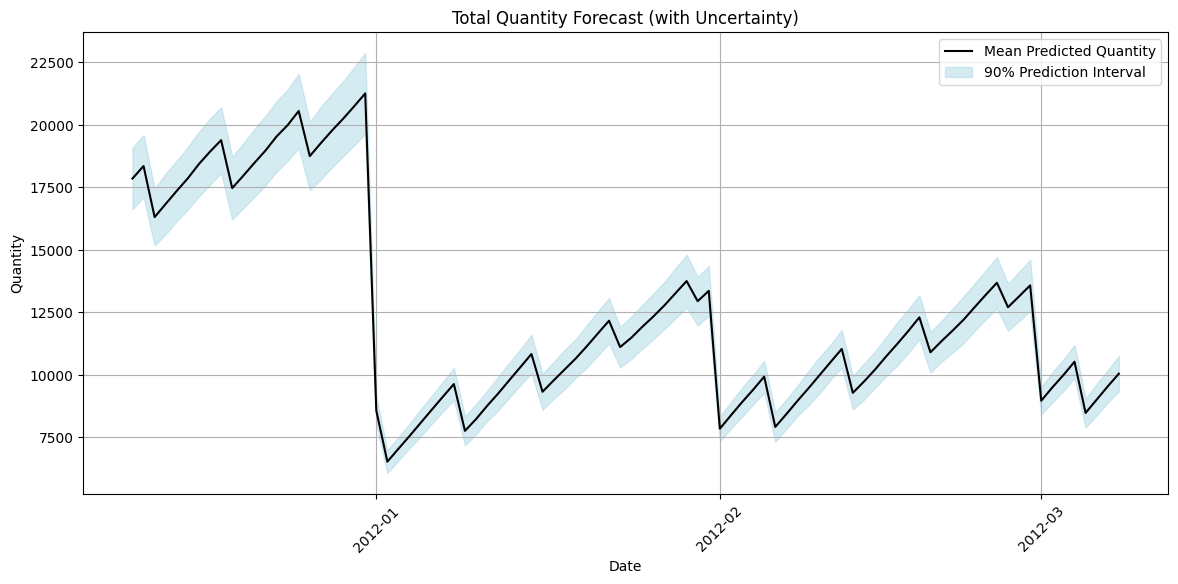

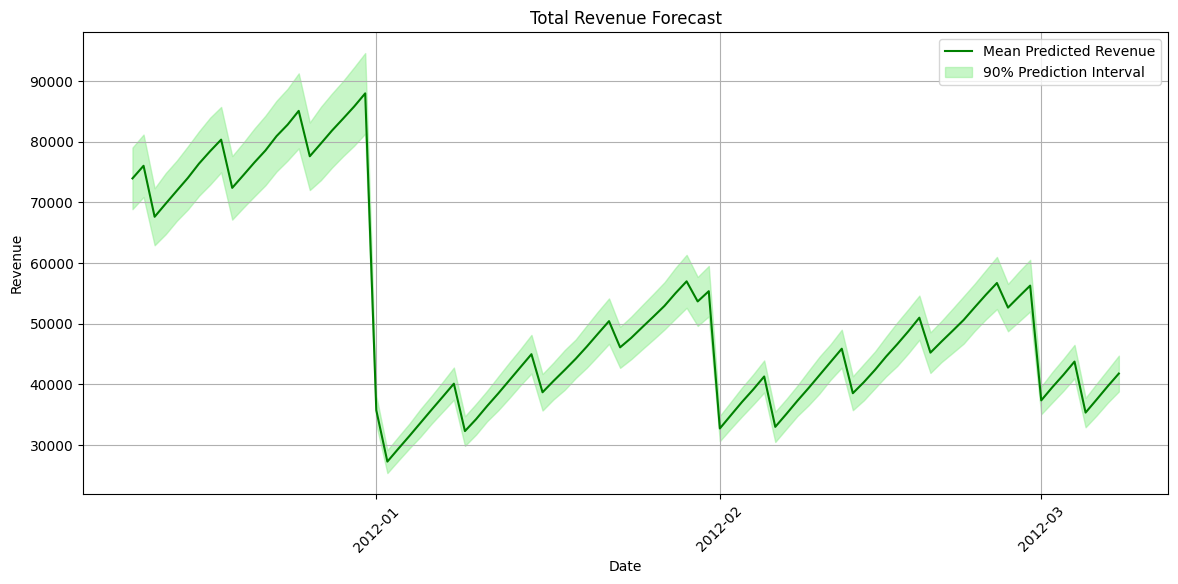

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfpl
import matplotlib.dates as mdates

tfd = tfp.distributions
tfpl = tfp.layers


grouped2 = grouped2.merge(price_variation[['Country', 'YearMonthDay', 'price_spike_flag']], on=['Country', 'YearMonthDay'], how='left')
grouped2['price_spike_flag'] = grouped2['price_spike_flag'].fillna(0)
grouped2 = grouped2.sort_values(['Country', 'YearMonthDay'])
grouped2['lag1_quantity'] = grouped2.groupby('Country')['Quantity'].shift(1).fillna(0)
grouped2['lag7_quantity'] = grouped2.groupby('Country')['Quantity'].shift(7).fillna(0)

le = LabelEncoder()
grouped2['Country_encoded'] = le.fit_transform(grouped2['Country'])

features = [
    'Country_encoded', 'day_of_week', 'month', 'day_of_month',
    'is_special_day', 'price_spike_flag', 'lag1_quantity', 'lag7_quantity'
]

X = grouped2[features]
y = grouped2['Quantity']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_np = tf.constant(X_train.values, dtype=tf.float32)
y_train_np = tf.constant(y_train.values, dtype=tf.float32)
X_valid_np = tf.constant(X_valid.values, dtype=tf.float32)
y_valid_np = tf.constant(y_valid.values, dtype=tf.float32)

inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tfpl.DenseFlipout(64, activation='relu')(inputs)
x = tfpl.DenseFlipout(32, activation='relu')(x)
outputs = tfpl.DenseFlipout(1)(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train_np, y_train_np,
    validation_data=(X_valid_np, y_valid_np),
    epochs=400,
    batch_size=32,
    verbose=1
)
future_dates = pd.date_range(start=grouped2['YearMonthDay'].max() + pd.Timedelta(days=1), periods=90)
countries = grouped2['Country'].dropna().unique()
future_list = []
for country in countries:
    temp = pd.DataFrame({
        'Country': [country] * len(future_dates),
        'YearMonthDay': future_dates
    })
    future_list.append(temp)

future = pd.concat(future_list).reset_index(drop=True)

future['day_of_week'] = future['YearMonthDay'].dt.dayofweek
future['month'] = future['YearMonthDay'].dt.month
future['day_of_month'] = future['YearMonthDay'].dt.day
future['is_special_day'] = future['YearMonthDay'].isin(pd.to_datetime(special_days)).astype(int)
future = future.merge(price_variation[['Country', 'YearMonthDay', 'price_spike_flag']], on=['Country', 'YearMonthDay'], how='left')
future['price_spike_flag'] = future['price_spike_flag'].fillna(0)
future['Country_encoded'] = le.transform(future['Country'])
future['lag1_quantity'] = 0
future['lag7_quantity'] = 0

X_future = tf.constant(future[features].values, dtype=tf.float32)
n_samples = 100

y_future_samples = np.stack([
    model(X_future, training=True).numpy().squeeze()
    for _ in range(n_samples)
], axis=0)

y_future_mean = y_future_samples.mean(axis=0)
y_future_std = y_future_samples.std(axis=0)

future['Predicted_Quantity'] = y_future_mean
future['Predicted_Lower'] = np.clip(y_future_mean - 1.64 * y_future_std, a_min=0, a_max=None)
future['Predicted_Upper'] = np.clip(y_future_mean + 1.64 * y_future_std, a_min=0, a_max=None)

avg_price_per_country = df.groupby('Country')['UnitPrice'].mean().to_dict()
future['Average_UnitPrice'] = future['Country'].map(avg_price_per_country)

future['Predicted_Revenue'] = future['Predicted_Quantity'] * future['Average_UnitPrice']
future['Predicted_Revenue_Lower'] = future['Predicted_Lower'] * future['Average_UnitPrice']
future['Predicted_Revenue_Upper'] = future['Predicted_Upper'] * future['Average_UnitPrice']

total_quantity = future.groupby('YearMonthDay').agg({
    'Predicted_Quantity': 'sum',
    'Predicted_Lower': 'sum',
    'Predicted_Upper': 'sum'
}).reset_index()

total_revenue = future.groupby('YearMonthDay').agg({
    'Predicted_Revenue': 'sum',
    'Predicted_Revenue_Lower': 'sum',
    'Predicted_Revenue_Upper': 'sum'
}).reset_index()

plt.figure(figsize=(14, 6))
plt.plot(total_quantity['YearMonthDay'], total_quantity['Predicted_Quantity'], label='Mean Predicted Quantity', color='black')
plt.fill_between(
    total_quantity['YearMonthDay'],
    total_quantity['Predicted_Lower'],
    total_quantity['Predicted_Upper'],
    color='lightblue', alpha=0.5,
    label='90% Prediction Interval'
)
plt.title('Total Quantity Forecast (with Uncertainty)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(total_revenue['YearMonthDay'], total_revenue['Predicted_Revenue'], label='Mean Predicted Revenue', color='green')
plt.fill_between(
    total_revenue['YearMonthDay'],
    total_revenue['Predicted_Revenue_Lower'],
    total_revenue['Predicted_Revenue_Upper'],
    color='lightgreen', alpha=0.5,
    label='90% Prediction Interval'
)
plt.title('Total Revenue Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.grid()
plt.legend()
plt.show()


### Indeed the bayesian neural newtork fails to capture effectively local trends and has a considerably higher rmse and mse. However, in case of a larget dataset, or of a longer time extrapolation, bnn is expected to generalize better over long periods of time.